In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
df =pd.read_csv('flights_NY.csv')
print(df)



        year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
0       2013      1    1     517.0        2.0     830.0       11.0      UA   
1       2013      1    1     533.0        4.0     850.0       20.0      UA   
2       2013      1    1     542.0        2.0     923.0       33.0      AA   
3       2013      1    1     544.0       -1.0    1004.0      -18.0      B6   
4       2013      1    1     554.0       -6.0     812.0      -25.0      DL   
...      ...    ...  ...       ...        ...       ...        ...     ...   
336771  2013      9   30       NaN        NaN       NaN        NaN      9E   
336772  2013      9   30       NaN        NaN       NaN        NaN      9E   
336773  2013      9   30       NaN        NaN       NaN        NaN      MQ   
336774  2013      9   30       NaN        NaN       NaN        NaN      MQ   
336775  2013      9   30       NaN        NaN       NaN        NaN      MQ   

       tailnum  flight origin dest  air_time  distance  
0     

Колонки с пропущенными значениями: Index(['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum',
       'air_time'],
      dtype='object')
Количество строк с хотя бы одним пропущенным значением: 9430


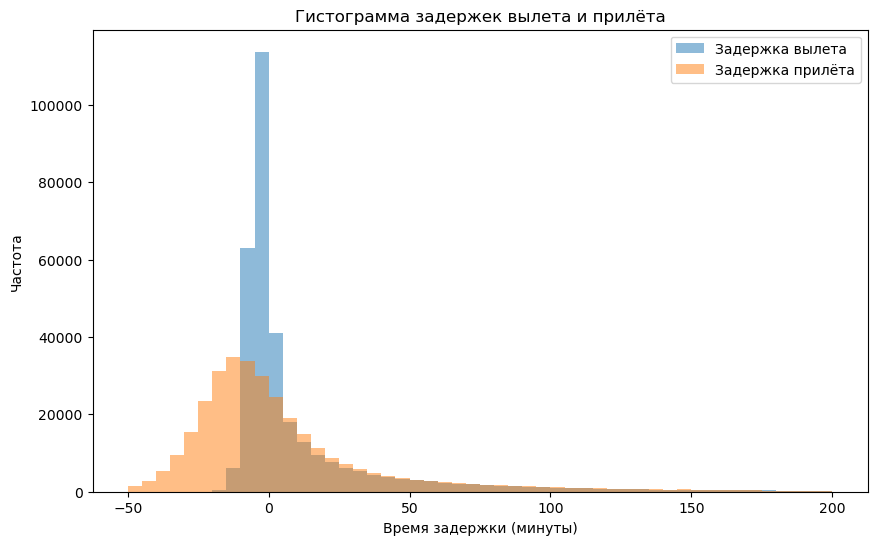

Задержка вылета:
Средняя: 12.555155706805643
Медианная: -2.0
Стадартное отклонение: 40.06568758557109

Задержка прилёта
Средняя: 6.89537675731489
Медиана: -5.0
Стадартное отклонение: 44.63329169019526


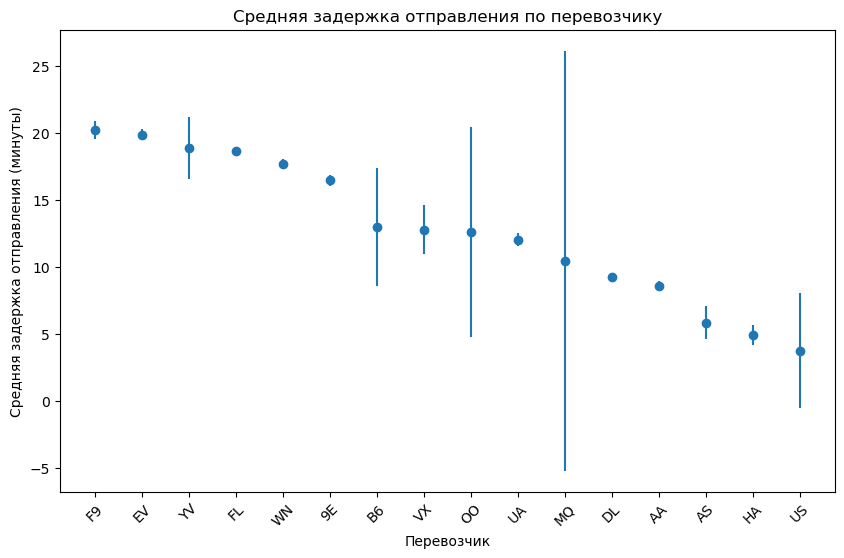

Различие в среднем времени задержки вылета значимо.
Уровень значимости: 0.05
p-значение: 0.01945036352051051


In [3]:
# 1. Поиск пропущенных значений
missing_columns = df.columns[df.isnull().any()]
num_rows_with_missing_values = df[df.isnull().any(axis=1)].shape[0]
print("Колонки с пропущенными значениями:", missing_columns)
print("Количество строк с хотя бы одним пропущенным значением:", num_rows_with_missing_values)

# Удаление строк с пропущенными значениями
df = df.dropna()








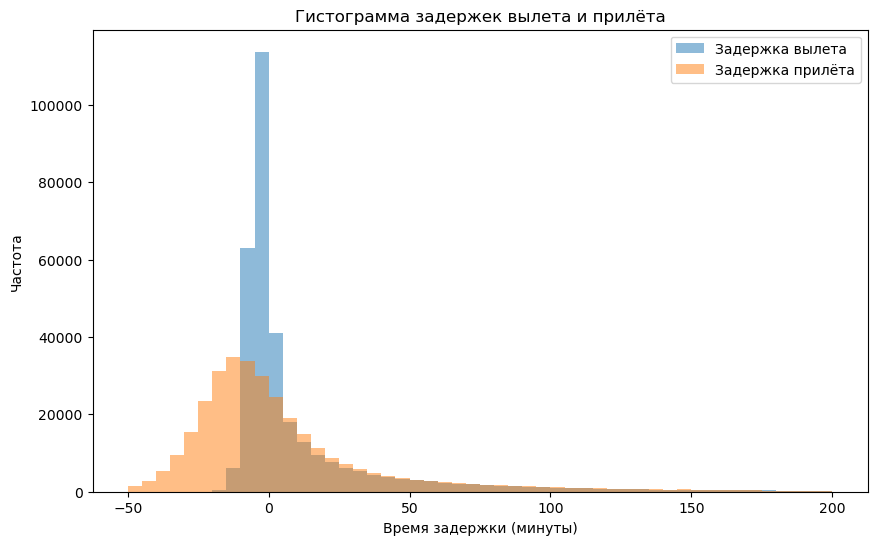

In [4]:
# 2. Построение гистограмм времени задержки вылета и прилета
plt.figure(figsize=(10, 6))
plt.hist(df['dep_delay'], bins=50, range=(-50, 200), alpha=0.5, label='Задержка вылета')
plt.hist(df['arr_delay'], bins=50, range=(-50, 200), alpha=0.5, label='Задержка прилёта')
plt.xlabel('Время задержки (минуты)')
plt.ylabel('Частота')
plt.title('Гистограмма задержек вылета и прилёта')
plt.legend()
plt.show()

In [5]:
# 3. Оценка среднего, медианы и стандартного отклонения задержек
dep_delay_mean = df['dep_delay'].mean()
dep_delay_median = df['dep_delay'].median()
dep_delay_std = df['dep_delay'].std()

arr_delay_mean = df['arr_delay'].mean()
arr_delay_median = df['arr_delay'].median()
arr_delay_std = df['arr_delay'].std()

print("Задержка вылета:")
print("Средняя:", dep_delay_mean)
print("Медианная:", dep_delay_median)
print("Стадартное отклонение:", dep_delay_std)

print("\nЗадержка прилёта")
print("Средняя:", arr_delay_mean)
print("Медиана:", arr_delay_median)
print("Стадартное отклонение:", arr_delay_std)

Задержка вылета:
Средняя: 12.555155706805643
Медианная: -2.0
Стадартное отклонение: 40.06568758557109

Задержка прилёта
Средняя: 6.89537675731489
Медиана: -5.0
Стадартное отклонение: 44.63329169019526


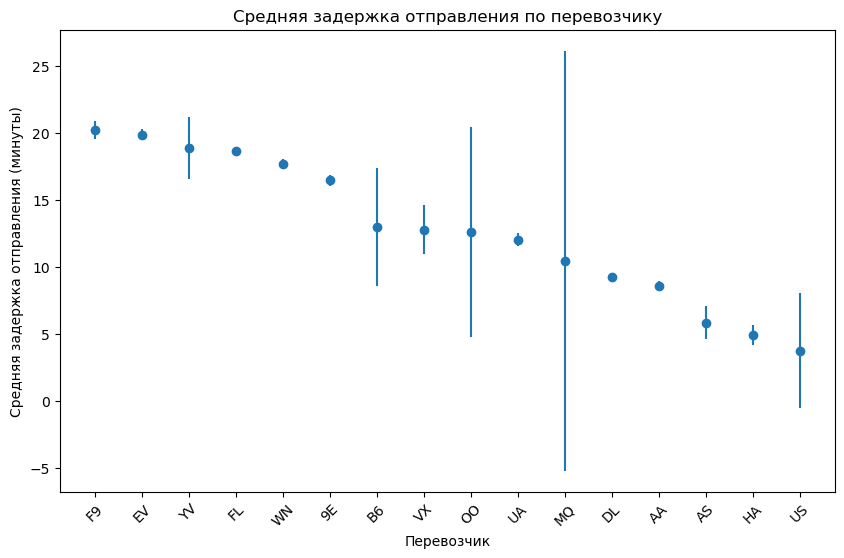

In [6]:
# 4. Сортировка авиакомпаний по средней задержке вылета и построение графика
carrier_delay_mean = df.groupby('carrier')['dep_delay'].mean().sort_values(ascending=False)
carrier_delay_std = df.groupby('carrier')['dep_delay'].std()
carrier_count = df['carrier'].value_counts()

# Расчет 95%-доверительного интервала
confidence_interval = stats.t.interval(0.95, df=carrier_count - 1, loc=carrier_delay_mean, scale=carrier_delay_std / np.sqrt(carrier_count))

# Построение графика
plt.figure(figsize=(10, 6))
plt.errorbar(carrier_delay_mean.index, carrier_delay_mean, yerr=(confidence_interval[1] - confidence_interval[0]) / 2, fmt='o')
plt.xlabel('Перевозчик')
plt.ylabel('Средняя задержка отправления (минуты)')
plt.title('Средняя задержка отправления по перевозчику')
plt.xticks(rotation=45)
plt.show()

In [7]:
# 5. Проверка различия в среднем времени задержки вылета для American Airlines (AA) и Delta Airlines (DL)
aa_delay = df[df['carrier'] == 'AA']['dep_delay']
dl_delay = df[df['carrier'] == 'DL']['dep_delay']

# Проверка на равенство средних с использованием t-теста
t_statistic, p_value = stats.ttest_ind(aa_delay, dl_delay)
alpha = 0.05

if p_value < alpha:
    print("Различие в среднем времени задержки вылета значимо.")
else:
    print("Различие в среднем времени задержки вылета незначимо.")
print("Уровень значимости:", alpha)
print("p-значение:", p_value)

Различие в среднем времени задержки вылета значимо.
Уровень значимости: 0.05
p-значение: 0.01945036352051051
